### Abstract
本期我们将学习二分类-硬输出的另一种算法：线性判别分析，这实际上也是一种降维的算法。

选定一个方向，将高维样本投影到这个方向上，从而对样本进行二分类。

### Idea
线性判别分析的核心思想是使投影后的数据满足两个条件：
* 相同类内部的样本距离接近
* 不同类别之间的距离较大

### Algorithm
要降维，我们首先要知道如何计算投影。

我们假定样本为$x$，沿$w$方向做投影

我们知道：$w\cdot x=||w||*||x||* \cos{\theta}$

这里我们假设 $||w||=1$，确定唯一的 $w$，防止放缩导致无数解

所以 $w\cdot x=||x||*\cos{\theta}$

而 $||x||*\cos{\theta}$ 正是投影的定义

所以样本点在向量 $w$ 上的投影长度为 $w\cdot x$

故投影长度 $z=w^T\cdot x$

我们假定属于两个类的样本数量分别为 $N1,N2$

下面对于第一个条件：**相同类内部的样本距离接近**，我们使用方差矩阵来表征每个类内部的总体分布。这里我们使用协方差矩阵的定义，用$S$表示原数据$x$的协方差矩阵

\begin{equation}
\begin{aligned}C_1: Var_z[C_1]&=\frac{1}{N_1}\sum_{i=1}^{N_1} (z_i-\overline{z_{c1}})(z_i-\overline{z_{c1}})^T\\
&=\frac{1}{N_1}\sum_{i=1}^{N_1}(w^T x_i-\frac{1}{N_1}\sum_{j=1}^{N_1}w^T x_j)(w^T x_i-\frac{1}{N_1}\sum_{j=1}^{N_1}w^T x_j)^T \\&=w^T \frac{1}{N_1}\sum_{i=1}^{N_1}(x_i-\frac{1}{N_1}\sum_{j=1}^{N_1} x_j)(x_i-\frac{1}{N_1}\sum_{j=1}^{N_1} x_j)^T w\\&=w^{T} \frac{1}{N_{1}} \sum_{i=1}^{N_{1}}\left(x_{i}-\overline{x_{c 1}}\right)\left(x_{i}-\overline{x_{c 1}}\right)^{T} w\\&=w^T S_1 w\\C_2: Var_z[C_2]&=\frac{1}{N_2}\sum_{i=1}^{N_2} (z_i-\overline{z_{c2}})(z_i-\overline{z_{c2}})^T\\&=w^T S_2 w
\end{aligned}
\end{equation}

所以类内距离可以记为：
$$
Var_z[C_1]+Var_z[C_2]=w^T(S_1+S_2)w
$$

对于第二个条件：**不同类别之间的距离较大**

我们可以用两个类的投影均值表示类间距离：
\begin{equation}
\begin{aligned}
(z_{c1}-z_{c2})^2&=(\frac{1}{N_1}\sum_{i=1}^{N_1}w^T x_i - \frac{1}{N_2}\sum_{i=1}^{N_2}w^T x_i)^2\\
&=(w^T(\frac{1}{N_1}\sum_{i=1}^{N_1} x_i - \frac{1}{N_2}\sum_{i=1}^{N_2} x_i))^2\\
&=(w^T(\overline{x_{c1}}-\overline{x_{c2}}))^2\\
&=w^T(\overline{x_{c1}}-\overline{x_{c2}})(\overline{x_{c1}}-\overline{x_{c2}})^T w
\end{aligned}
\end{equation}

好，现在再回头看看我们的两个条件：
* 相同类内部的样本距离接近
* 不同类别之间的距离较大
我们很容易给出一个直观的损失函数：
$$
L(w)=\frac{Var_z[C_1]+Var_z[C_2]}{(z_{c1}-z_{c2})^2}
$$

通过最小化损失函数，我们得到最优的$w$:
\begin{equation}
\begin{aligned}
\widehat{w}=argmin(L(w))&=argmin(\frac{Var_z[C_1]+Var_z[C_2]}{(z_{c1}-z_{c2})^2})\\
&=argmin(\frac{w^T(S_1+S_2)w}{w^T(\overline{x_{c1}}-\overline{x_{c2}})(\overline{x_{c1}}-\overline{x_{c2}})^T w})\\
&=argmin(\frac{w^T S_w w}{w^T S_b w})
\end{aligned}
\end{equation}

其中：
* $S_w$ 为with-class: 类内方差
* $S_b$ 为between-class: 类间方差

下面对上式做偏导：
$$
\begin{aligned}
\frac{\partial{L(w)}}{\partial{w}}&=\frac{\partial}{\partial{w}}(w^T S_w w)(w^T S_b w)^{-1}\\
&=2 S_{b} w\left(w^{T} S_{w} w\right)^{-1}-2 w^{T} S_{b} w\left(w^{T} S_{w} w\right)^{-2} S_{w} w=0\\
\end{aligned}
$$

对方程做变换：
$$
\begin{aligned}
\left(w^{T} S_{b} w\right) S_{w} w&=S_{b} w\left(w^{T} S_{w} w\right)\\
\left(w^{T} S_{b} w\right) w&=S_{w}^{-1}S_{b} w\left(w^{T} S_{w} w\right)
\end{aligned}
$$
注意到，$w^T S_b w$与$w^T S_w w$的形状为: $(1,p)* (p,p)* (p,1)=(1,1)$

因此这两项都为标量，只是对向量的大小进行放缩，不改变方向，因此上式更为：
$$
w \propto S_{w}^{-1} S_{b} w=S_{w}^{-1}\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)^{T} w 
$$
又因为$\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)^{T} w$也为标量，因此得到最终的式子：
$$
\widehat{w}\propto S_{w}^{-1}\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)
$$
因此$S_{w}^{-1}\left(\overline{x_{c 1}}-\overline{x_{c 2}}\right)$即为我们要寻找的方向，最后可以归一化得到单位的$w$

### Implement

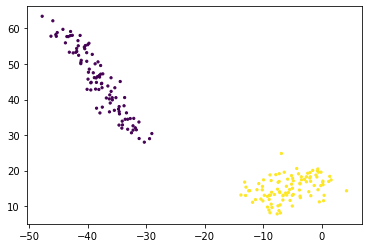

In [1]:
import numpy as np
import os
os.chdir("../")
from models.linear_models import LDA

x = np.linspace(0, 100, num=100)
w1, b1 = 0.1, 10
w2, b2 = 0.3, 30
epsilon = 2
k = 0.2
b = 20
w = np.asarray([-k, 1])
v1 = x * w1 + b1 + np.random.normal(scale=epsilon, size=x.shape)
v2 = x * w2 + b2 + np.random.normal(scale=epsilon, size=x.shape)
x1 = np.c_[x, v1]
x2 = np.c_[x, v2]
l1 = np.ones(x1.shape[0])
l2 = np.zeros(x2.shape[0])
data = np.r_[x1, x2]
label = np.r_[l1, l2]

model = LDA()
model.fit(x1, x2)
model.draw(data, label)